# 5.8 Midterm Assignment: Practice
With the accidents involving Boeing's 737 Max, there have been speculations and concerns about airline safety. Then, there was a helicopter crash involving Kobe Bryant. Academic studies have found that high-profile crashes can shift passenger demand away from the airlines involved in the disasters.<p>

Should travelers avoid airlines that have had crashes in the past? That is the question we will try to address in this exercise. The dataset for this has been sourced from Aviation Safety Network.<p>
Step 1: Use this dataset and two different clustering approaches (agglomerative and divisive) to group the airlines with similar safety records.<p>

Step 2: Do these two approaches lead to the same/similar results? Provide appropriate visualizations, clustering summaries, and your interpretations.<p>

In [71]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import silhouette_score, euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import scipy.cluster.hierarchy as sch

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [8]:
%run ../setup_uw.ipynb

make_jupyter_cells_wide()


In [72]:
def gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    '''
    X     = Matrix of X with added bias units
    y     = Vector of Y
    theta = Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = number of iterations
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, theta.shape[0]))
    for it in range(iterations):
        prediction = X.dot(theta)
        theta = theta - (1/m) * learning_rate * (X.T.dot(prediction - y))
        cost = (1/(2*m)) * np.sum((prediction - y)**2)
        theta_history[it, :] = theta.T
        cost_history[it] = cost
    return theta, cost_history, theta_history

def cost_fun(theta,X,y):
    '''Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1)) only for simple regression
    where:
        j is the no of features
    '''
    n = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*n)) * np.sum((predictions-y)**2)
    return cost

In [73]:
df_derm = pd.read_csv('dermatology.csv', sep='\t')
df_derm['Age'] = pd.to_numeric(df_derm['Age'], errors='coerce')
df_derm = df_derm[df_derm['Age'] > 0]
df_derm.columns = df_derm.columns.str.strip()
print(df_derm.columns)
display(df_derm.head(3))
df_derm.info()

Index(['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner',
       'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Family Hostory',
       'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis',
       'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing',
       'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal',
       'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular.1',
       'Perifollicular', 'Inflamatory', 'Band-like', 'Age', 'Disease'],
      dtype='object')


,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,Family Hostory,Melanin,Eosinophils,PNL,Fibrosis,Exocytosis,Acanothosis,Hyperkeratosis,Parakeratosis,Clubbing,Elongation,Thinning,Spongiform,Munro,Focal,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3


<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 0 to 365
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Erythema          357 non-null    int64  
 1   Scathing          357 non-null    int64  
 2   Definite Borders  357 non-null    int64  
 3   Itching           357 non-null    int64  
 4   Koebner           357 non-null    int64  
 5   Polygonal         357 non-null    int64  
 6   Follicular        357 non-null    int64  
 7   Oral              357 non-null    int64  
 8   Knee              357 non-null    int64  
 9   Scalp             357 non-null    int64  
 10  Family Hostory    357 non-null    int64  
 11  Melanin           357 non-null    int64  
 12  Eosinophils       357 non-null    int64  
 13  PNL               357 non-null    int64  
 14  Fibrosis          357 non-null    int64  
 15  Exocytosis        357 non-null    int64  
 16  Acanothosis       357 non-null    int64  
 17  Hy

In [74]:
pd.set_option('display.max_columns', None)
df_derm['Age'] = pd.to_numeric(df_derm['Age'], errors='coerce')
df_derm.describe()

,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,Family Hostory,Melanin,Eosinophils,PNL,Fibrosis,Exocytosis,Acanothosis,Hyperkeratosis,Parakeratosis,Clubbing,Elongation,Thinning,Spongiform,Munro,Focal,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.081232,1.809524,1.571429,1.355742,0.635854,0.450980,0.170868,0.380952,0.619048,0.526611,0.123249,0.411765,0.142857,0.543417,0.316527,1.372549,1.955182,0.509804,1.288515,0.658263,0.980392,0.641457,0.299720,0.364146,0.40056,0.476190,0.462185,0.952381,0.459384,0.106443,0.117647,1.882353,0.554622,36.397759,2.787115
std,0.663334,0.701218,0.901666,1.136500,0.909780,0.957513,0.577132,0.838321,0.988971,0.910299,0.329185,0.878057,0.416359,0.811741,0.829973,1.111041,0.701689,0.755533,0.922994,1.060406,1.159793,1.041426,0.676512,0.761911,0.85742,0.872565,0.960950,1.129520,0.960836,0.455784,0.494517,0.693183,1.106905,15.224677,1.593368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,3.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,50.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


# Problem 1: Dermatology
This database contains 34 attributes. 35th is the class label, i.e. the disease name. The names and id numbers of the patients were removed from the database.<p>

The differential diagnosis of erythemato-squamous diseases is a real problem in dermatology. They all share the clinical features of erythema and scaling, with very little differences. The diseases in this group are psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris. Usually a biopsy is necessary for the diagnosis but unfortunately these diseases share many histopathological features as well. Another difficulty for the differential diagnosis is that a disease may show the features of another disease at the beginning stage and may have the characteristic features at the following stages. Patients were first evaluated clinically with 12 features. Afterwards, skin samples were taken for the evaluation of 22 histopathological features. The values of the histopathological features are determined by an analysis of the samples under a microscope.<p>

In the dataset constructed for this domain, the family history feature has the value 1 if any of these diseases has been observed in the family, and 0 otherwise. The age feature simply represents the age of the patient. Every other feature (clinical and histopathological) was given a degree in the range of 0 to 3. Here, 0 indicates that the feature was not present, 3 indicates the largest amount possible, and 1, 2 indicate the relative intermediate values.<p>

Assuming that the list of diseases in this group are complete (total 6 types), use the dataset to address the following list of objectives:<p>

1. Let’s try determining the type of disease based on the patient’s Age. Use gradient descent (GD) to build your regression model (model1). Start by writing the GD algorithm and then implement it using a programming language of your choice. [10 points]<p>
2. Use random forest on the clinical as well as histopathological attributes to classify the disease type (model2). [5 points]<p>
3. Use kNN on the clinical attributes and histopathological attributes to classify the disease type and report your accuracy (model3). [5 points]<p>
4. Finally, use two different clustering algorithms and see how well these attributes can determine the disease type (model4 and model5). [10 points]<p>
5. Make sure to report your actual model for each of the above. This means providing appropriate details containing the features used, parameters learned/estimated, and any inputs (e.g., number of clusters, error limit) that go into the technique. When appropriate, perform multiple runs of the same technique and report average values or their spread.<p>
6. Now, compare and contrast the five models you built. Having done both classification and clustering on the same dataset, what can you say about this data and/or the techniques you used? Write your thoughts in 2-3 paragraphs. [10 points]<p>
7. Overall presentation (lack of spelling and other errors, consistent formatting, clear results). [5 points]<p>

In [75]:
model_types = ['GradientDescent', 'RandomForest', 'KNN']
cluster_types = ['Agglomerative', 'KMeans']
results = {}
features_all = ['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner','Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Family Hostory',
       'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis', 'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing',
       'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal', 'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular.1',
       'Perifollicular', 'Inflamatory', 'Band-like', 'Age']
predictor = 'Disease'

In [76]:
df_derm = df_derm[df_derm['Age'] > 0]
df_filtered = df_derm.copy()

## Problem 1.1
The Gradient Descent Algorithm:<p>
$\text{repeat until convergence: } \theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta_j} $J$(\theta_0,\theta_1) (\text{for j=1 and j=0})$
    
where,
    
  $\alpha$ is the learning rate<p>
  $\theta$ are the features<p>
  J is the loss or cost function<p>

In [14]:
# Test with OLS first to validate Gradient Descent

# Train the linear regression model on the training data
model = smf.ols('Disease ~ Age', data=df_derm)
model_result = model.fit()

# Print the summary of the model trained on the training data
print("Summary of the model trained on the training data:")
print(model_result.summary())

Summary of the model trained on the training data:
                            OLS Regression Results                            
Dep. Variable:                Disease   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     26.49
Date:                Wed, 07 May 2025   Prob (F-statistic):           4.39e-07
Time:                        17:08:20   Log-Likelihood:                -659.52
No. Observations:                 357   AIC:                             1323.
Df Residuals:                     355   BIC:                             1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

In [15]:
# Correct for Final
# Prepare the data
X = df_derm['Age'].values.reshape(-1, 1)
y = df_derm['Disease'].values.reshape(-1, 1)
m = len(y)

# Standardize X and y
X_mean, X_std = X.mean(), X.std()
y_mean, y_std = y.mean(), y.std()
X_scaled = (X - X_mean) / X_std
y_scaled = (y - y_mean) / y_std

# Add bias column
X_b = np.c_[np.ones((m, 1)), X_scaled]

# Initialize theta
theta = np.zeros((2, 1))

# Set hyperparameters
learning_rate = 0.1
iterations = 1000

# Train using gradient descent
theta_final, cost_history, theta_history = gradient_descent(X_b, y_scaled, theta, learning_rate, iterations)

# Recover coefficients in original scale
slope = (y_std / X_std) * theta_final[1, 0]
intercept = y_mean - slope * X_mean

# Print results
print("Gradient Descent Model Coefficients (original units):")
print(f"Intercept: {intercept:.4f}")
print(f"Slope (Age): {slope:.4f}")

Gradient Descent Model Coefficients (original units):
Intercept: 3.7909
Slope (Age): -0.0276


In [16]:
# Trying with manual scaling features
step = 'Problem1.1-NoFeatScale'  # model1
model_type = model_types[0]  # 'GradientDescent'
# Set hyperparameters
learning_rate = 0.1  # Try this or even 0.3
iterations = 1000    # That's enough if learning rate is solid
features = ['Age']
features_scaled = True
predictor = 'Disease'
print(f"{step}: {model_type} Prediction of {predictor} using {features} with {learning_rate=} {iterations=} Age=0 filtered out; {features_scaled=}")

# Filtering out Age == 0
X = df_filtered[features]
y = df_filtered[predictor]
m = len(y)
# Standardize X and y
X_mean, X_std = X.mean(), X.std()
y_mean, y_std = y.mean(), y.std()
X_scaled = (X - X_mean) / X_std
y_scaled = (y - y_mean) / y_std
y_scaled = y_scaled.values.reshape(-1, 1)
# Add bias column
X_b = np.c_[np.ones((m, 1)), X_scaled]

# Initialize theta
theta = np.zeros((2, 1))

# Train using gradient descent
theta_final, cost_history, theta_history = gradient_descent(X_b, y_scaled, theta, learning_rate, iterations)

# Recover coefficients in original scale
slope = (y_std / X_std) * theta_final[1, 0]
slope = float(slope.iloc[0])
X_mean = X_mean.iloc[0] if isinstance(X_mean, pd.Series) else X_mean
y_mean = y_mean.iloc[0] if isinstance(y_mean, pd.Series) else y_mean

# Calculate intercept
intercept = y_mean - slope * X_mean
intercept = float(intercept)

# Print results
print("Gradient Descent Model Coefficients (original units):")
print(f"Intercept: {intercept:.4f}")
print(f"Slope (X): {slope:.4f}")

# Convert to pandas Series or NumPy arrays if they aren't already
X_test_age = X
y_test = y

# --- 1. Make predictions using your learned coefficients ---
# Your prediction function: y_hat = intercept + slope * Age
y_pred = (intercept + slope * X_test_age)['Age'].to_list()

print(f"\nPredictions (first 5):")
display(y_pred[:3])

# --- 2. Calculate Mean Squared Error ---
# Use the mean_squared_error function
mse = mean_squared_error(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.4f}")

# You can also calculate RMSE (Root Mean Squared Error) if desired
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

results[step] = {'model_type': model_type, 'learning_rate': learning_rate, 'iterations': iterations, 'features': features, 'predictor': predictor,
                 'slope': slope, 'intercept': intercept, 'dataset': 'filtered, age>0', 'features_scaled': features_scaled}

Problem1.1-NoFeatScale: GradientDescent Prediction of Disease using ['Age'] with learning_rate=0.1 iterations=1000 Age=0 filtered out; features_scaled=True
Gradient Descent Model Coefficients (original units):
Intercept: 3.7909
Slope (X): -0.0276

Predictions (first 5):


[2.274079209188549, 3.5703034147336976, 3.0738771232483217]


Mean Squared Error (MSE): 2.3559
Root Mean Squared Error (RMSE): 1.5349


In [17]:
# Trying with StandardSclaer scaling features
step = 'Problem1.1-FeatScale'  # model1
model_type = model_types[0]  # 'GradientDescent'
# Set hyperparameters
learning_rate = 0.1  # Try this or even 0.3
iterations = 1000    # That's enough if learning rate is solid
features = ['Age']
features_scaled = True
predictor = 'Disease'
print(f"{step}: {model_type} Prediction of {predictor} using {features} with {learning_rate=} {iterations=} Age=0 filtered out; {features_scaled=}")

random_state=42
# --- Split data into training and testing sets BEFORE scaling ---
X_train_age, X_test_age, y_train, y_test = train_test_split(
    df_filtered['Age'].values.reshape(-1, 1), # Age feature reshaped for scaler
    df_filtered['Disease'].values.reshape(-1, 1), # Disease target reshaped for scaler
    test_size=0.2, # Use 20% for testing
    random_state=random_state
)

# --- Standardize X_train and y_train for GD training ---
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train_age)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)

# Add bias column to scaled training features
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

# --- Assume gradient_descent function is defined and trained your model ---
theta_final, cost_history, theta_history = gradient_descent(X_train_b, y_train_scaled, theta, learning_rate, iterations)

# --- Using mock theta_final for demonstration ---
# Replace with your actual theta_final from your GD training
theta_final = np.array([[slope], [intercept]]) # Example theta_final (scaled coefficients)
print("\nUsing theta_final for demonstration.")

# --- Recover coefficients in original scale ---
# Get mean and std from the scalers fitted on training data
X_mean_train = scaler_X.mean_[0]
X_std_train = scaler_X.scale_[0]
y_mean_train = scaler_y.mean_[0]
y_std_train = scaler_y.scale_[0]

# Calculate intercept and slope in original scale
slope_new = (y_std_train / X_std_train) * theta_final[1, 0]
intercept_new = y_mean_train - slope_new * X_mean_train

print("\nGradient Descent Model Coefficients (original units):")
print(f"Intercept: {intercept_new:.4f}")
print(f"Slope (X): {slope_new:.4f}")

# --- Prepare test data for evaluation ---
# Scale the test Age data using the *same scaler fitted on training data*
X_test_scaled = scaler_X.transform(X_test_age)

# --- 1. Make predictions on the TEST data using original coefficients ---
# Prediction function: y_hat = intercept + slope * Age (original scale)
y_pred_test = intercept + slope * X_test_age.flatten() # Ensure X_test_age is 1D for calculation

# --- 2. Calculate Mean Squared Error on the TEST data ---
# Use the mean_squared_error function with original scale y_test
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"\nMean Squared Error (MSE) on Test Data: {mse_test:.4f}")

# Calculate RMSE
rmse_test = np.sqrt(mse_test)
print(f"Root Mean Squared Error (RMSE) on Test Data: {rmse_test:.4f}")

results[step] = {'model_type': model_type, 'learning_rate': learning_rate, 'iterations': iterations, 'features': features, 'predictor': predictor,
                 'slope': slope, 'intercept': intercept, 'dataset': 'filtered, age>0', 'features_scaled': features_scaled}

Problem1.1-FeatScale: GradientDescent Prediction of Disease using ['Age'] with learning_rate=0.1 iterations=1000 Age=0 filtered out; features_scaled=True

Using theta_final for demonstration.

Gradient Descent Model Coefficients (original units):
Intercept: -11.3233
Slope (X): 0.3852

Mean Squared Error (MSE) on Test Data: 2.3393
Root Mean Squared Error (RMSE) on Test Data: 1.5295


In [61]:
def mean_squared_error(y_true, y_predicted):
    # Calculating the loss or cost
    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent_4(x, y, iterations = 1000, learning_rate = 0.0001, stopping_threshold = 1e-6, scatter_cost = False):
    # Initializing weight, bias, learning rate and iterations
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
    costs = []
    weights = []
    previous_cost = None
    # Estimation of optimal parameters 
    for i in range(iterations):
        # Making predictions
        y_predicted = (current_weight * x) + current_bias
        # Calculating the current cost
        current_cost = mean_squared_error(y, y_predicted)
        # If the change in cost is less than or equal to 
        # stopping_threshold we stop the gradient descent
        if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
            break
        previous_cost = current_cost
        costs.append(current_cost)
        weights.append(current_weight)
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_predicted))
        bias_derivative = -(2/n) * sum(y-y_predicted)
        # Updating weights and bias
        current_weight = current_weight - (learning_rate * weight_derivative)
        current_bias = current_bias - (learning_rate * bias_derivative)
    if scatter_cost:
        # Visualizing the weights and cost at for all iterations
        plt.figure(figsize = (8,6))
        plt.plot(weights, costs)
        plt.scatter(weights, costs, marker='o', color='red')
        plt.title("Cost vs Weights")
        plt.ylabel("Cost")
        plt.xlabel("Weight")
        plt.show()
    return current_weight, current_bias

In [ ]:
y = df_filtered['Disease']
for feature in features_all:
    X = df_filtered[feature]
    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent_4(X, y, iterations=2000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

    # Making predictions using estimated parameters
    Y_pred = estimated_weight*X + estimated_bias

    # Plotting the regression line
    plt.figure(figsize = (8,6))
    plt.scatter(X, y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
            markersize=10,linestyle='dashed')
    plt.xlabel(feature)
    plt.ylabel("Disease")
    plt.show()

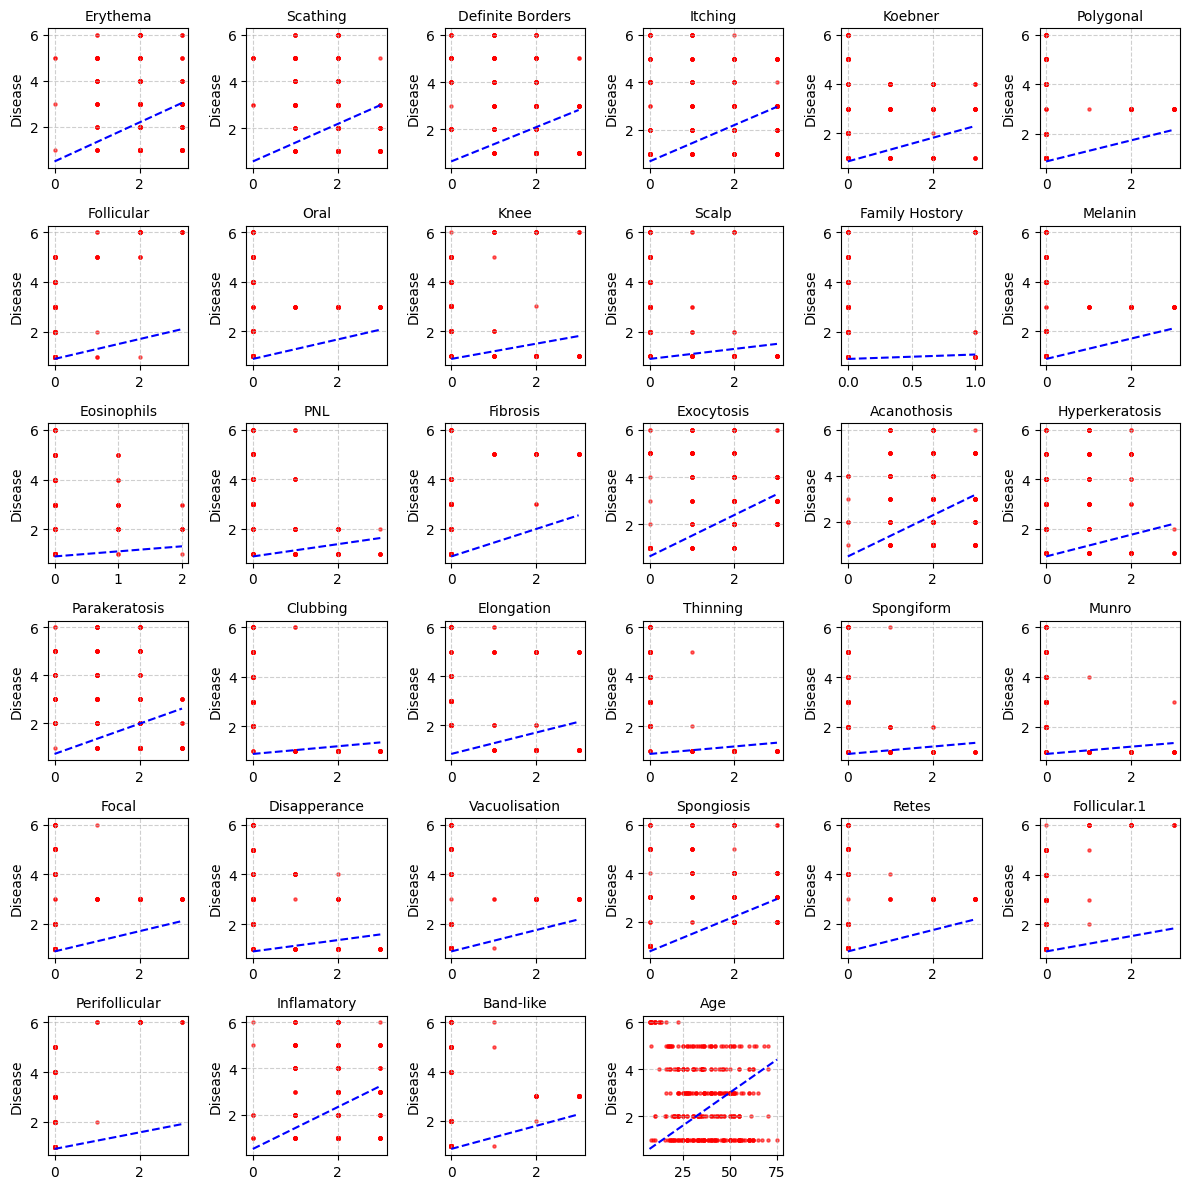

In [70]:
y_data = df_filtered['Disease']
n_features = len(features_all)

# Determine grid dimensions
# Aim for a grid that is roughly square, with a maximum of 5 columns
n_cols = min(6, int(np.ceil(np.sqrt(n_features))))
n_rows = int(np.ceil(n_features / n_cols))

# Create the figure and a grid of subplots
# Adjust figsize as needed for readability
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))

# Flatten the axes array for easy iteration, useful for both 1D and 2D grids
axes = axes.flatten()

# Remove any unused subplots if the number of features is less than the grid size
for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

# Loop through each feature and the corresponding subplot axis
for i, feature in enumerate(features_all):
    ax = axes[i] # Get the current axis object
    X_data = df_filtered[feature]
    # --- Perform Gradient Descent and Prediction ---
    # Call your gradient descent function to estimate weight and bias
    # Make sure gradient_descent_4 is defined and accessible in your environment
    try:
        estimated_weight, estimated_bias = gradient_descent_4(X_data, y_data, iterations=2000)
        # print(f"Feature: {feature}, Estimated Weight: {estimated_weight:.4f}, Estimated Bias: {estimated_bias:.4f}") # Optional: print parameters
        # Making predictions using estimated parameters
        Y_pred = estimated_weight * X_data + estimated_bias
        # --- Plotting on the current subplot ---
        # Plotting the scatter points (small size)
        ax.scatter(X_data, y_data, marker='o', color='red', s=5, alpha=0.6) # s controls marker size
        # Plotting the regression line
        # Create points for the line based on the min and max of the feature data
        line_x = np.array([X_data.min(), X_data.max()])
        line_y = estimated_weight * line_x + estimated_bias
        ax.plot(line_x, line_y, color='blue', linestyle='dashed')
        # Set titles and labels for the current subplot
        ax.set_ylabel('Disease')
        ax.set_title(feature, fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.6)
    except Exception as e:
        print(f"Could not process feature {feature} due to error: {e}")
        ax.set_title(f'{feature} vs. Disease (Error)')
        ax.text(0.5, 0.5, 'Plotting Error', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='red')

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the grid of plots
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
# Trying without scaling features
step = 'Problem1.1-LogRegClass'  # model1
model_type = 'LogisticClassifier'
features = ['Age']
features_scaled = True
predictor = 'Disease'
test_size = 0.2
random_state = 42
print(f"{step}: {model_type} Prediction of {predictor} using {features} with {learning_rate=} {iterations=} Age=0 filtered out; {features_scaled=}")

# Filtering out Age == 0
X = df_filtered[features]
y = df_filtered[predictor]

combined_data = pd.concat([X, y], axis=1)

# Drop rows that contain any NaN values in the combined data
# This ensures that if a row in X or y has a NaN, the entire row is removed,
# keeping X and y aligned.
cleaned_data = combined_data.dropna()

# Separate the cleaned features and target
X_cleaned = cleaned_data.drop(y.name, axis=1)
y_cleaned = cleaned_data[y.name]

print(f"\nShape of X after dropping rows with NaNs: {X_cleaned.shape}")
print(f"Shape of y after dropping rows with NaNs: {y_cleaned.shape}")


# --- Split cleaned data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=test_size, random_state=random_state)

print(f"\nTraining data shape after split: {X_train.shape}")
print(f"Testing data shape after split: {X_test.shape}")

# --- Scale the features ---
# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled using StandardScaler.")

# --- Train and Evaluate Logistic Regression ---
print("\n--- Logistic Regression Classifier (using cleaned and scaled data) ---")

# Initialize Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

print("Training the Logistic Regression model...")
# Train the model on the scaled training data
log_reg_model.fit(X_train_scaled, y_train)
print("Training complete.")

# Make predictions on the scaled test data
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Evaluate the model
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg, zero_division=0))
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")

Problem1.1-LogRegClass: LogisticClassifier Prediction of Disease using ['Age'] with learning_rate=0.1 iterations=1000 Age=0 filtered out; features_scaled=True

Shape of X after dropping rows with NaNs: (357, 1)
Shape of y after dropping rows with NaNs: (357,)

Training data shape after split: (285, 1)
Testing data shape after split: (72, 1)

Features scaled using StandardScaler.

--- Logistic Regression Classifier (using cleaned and scaled data) ---
Training the Logistic Regression model...
Training complete.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.29      1.00      0.44        20
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        12
           6       1.00      0.50      0.67         4

    accuracy                           0.31        72
   macr

In [19]:
step = 'Problem1.2'  # model2
model_type = model_types[1]  # 'RandomForest'
features = features_all
predictor = 'Disease'
test_size = .8
random_state = 42
print(f"{step}: {model_type} Prediction of {predictor} using {features} with {test_size=} {random_state=}")

X = df_derm[features]
y = df_derm[predictor]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
print(f"Shape of X_train before training: {X_train.shape}")

# Initialize and train a Decision Tree Classifier
clf = RandomForestClassifier(random_state=random_state)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"{model_type} Accuracy: {accuracy:.2f}")

print(f"\n{model_type} Classification Report:")
print(classification_report(y_test, y_pred))

print(f"\n{model_type} Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

results[step] = {'model_type': model_type, 'test_size': test_size, 'random_state': random_state, 'features': features, 'predictor': predictor,
                 'accuracy': accuracy, 'dataset': 'non filtered, e.g. age=0'}

Problem1.2: RandomForest Prediction of Disease using ['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner', 'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Family Hostory', 'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis', 'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing', 'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal', 'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular.1', 'Perifollicular', 'Inflamatory', 'Band-like', 'Age'] with test_size=0.8 random_state=42
Shape of X_train before training: (71, 34)
RandomForest Accuracy: 0.97

RandomForest Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.99      0.99        83
           2       0.89      0.96      0.92        50
           3       1.00      1.00      1.00        59
           4       0.95      0.97      0.96        39
           5       1.00      0.90      0.95        41
           6       1.00      1.00     

When using the filtered dataset without Age = 0 the accuracy goes up by 2 points to 97%. I would use this version of the model if allowed.<p>
Below is examining feature importance because I initially made a mistake by only putting in the Age feature.

In [20]:
clf.feature_importances_

array([0.01670802, 0.01782974, 0.02635006, 0.02785421, 0.03194692,
       0.0294643 , 0.03083157, 0.0070297 , 0.01817393, 0.04668158,
       0.00173106, 0.02431925, 0.0063966 , 0.01933784, 0.04382435,
       0.08509367, 0.02327412, 0.00663948, 0.01591466, 0.07464159,
       0.05275384, 0.06621175, 0.00751906, 0.03208663, 0.04414302,
       0.03125859, 0.04346655, 0.04164469, 0.02652257, 0.01537988,
       0.02301567, 0.0064699 , 0.01976213, 0.03572306])


Feature Importances (sorted):
Exocytosis          0.085094
Clubbing            0.074642
Thinning            0.066212
Elongation          0.052754
Scalp               0.046682
Focal               0.044143
Fibrosis            0.043824
Vacuolisation       0.043467
Spongiosis          0.041645
Age                 0.035723
Munro               0.032087
Koebner             0.031947
Disapperance        0.031259
Follicular          0.030832
Polygonal           0.029464
Itching             0.027854
Retes               0.026523
Definite Borders    0.026350
Melanin             0.024319
Acanothosis         0.023274
Perifollicular      0.023016
Band-like           0.019762
PNL                 0.019338
Knee                0.018174
Scathing            0.017830
Erythema            0.016708
Parakeratosis       0.015915
Follicular.1        0.015380
Spongiform          0.007519
Oral                0.007030
Hyperkeratosis      0.006639
Inflamatory         0.006470
Eosinophils         0.006397
Family Hosto

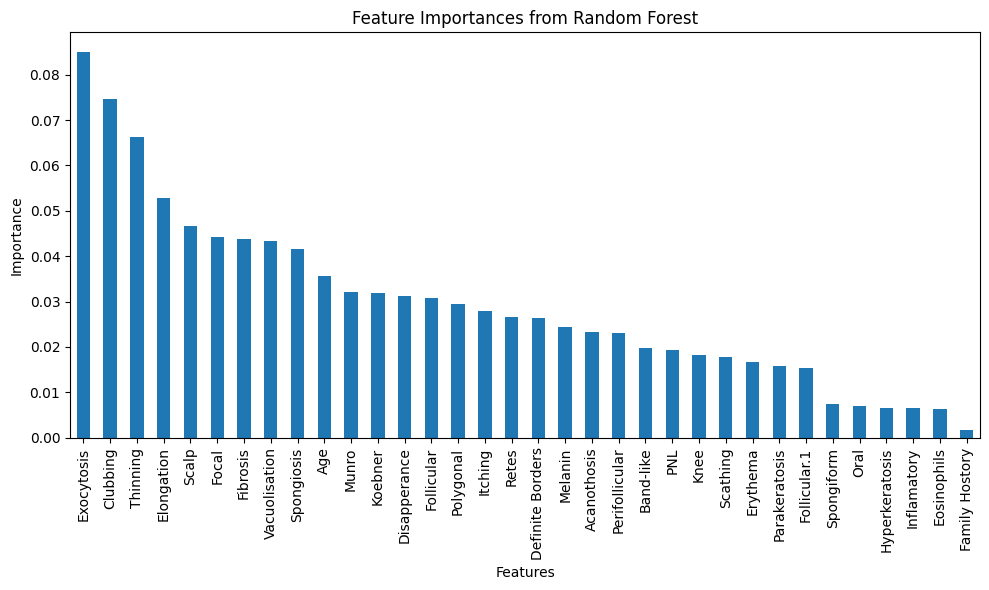


Selected features based on importance threshold (0.02):
['Exocytosis', 'Clubbing', 'Thinning', 'Elongation', 'Scalp', 'Focal', 'Fibrosis', 'Vacuolisation', 'Spongiosis', 'Age', 'Munro', 'Koebner', 'Disapperance', 'Follicular', 'Polygonal', 'Itching', 'Retes', 'Definite Borders', 'Melanin', 'Acanothosis', 'Perifollicular']

Selected top 10 features:
['Exocytosis', 'Clubbing', 'Thinning', 'Elongation', 'Scalp', 'Focal', 'Fibrosis', 'Vacuolisation', 'Spongiosis', 'Age']


In [21]:
# I had made a mistake in the features and was trying to figure out the importance of features
# --- Feature Selection using Feature Importance ---

# Get feature importances
feature_importances = clf.feature_importances_
# Create a pandas Series for easier handling and visualization
importance_series = pd.Series(feature_importances, index=features)

# Sort features by importance
sorted_importance_series = importance_series.sort_values(ascending=False)

# Print feature importances
print("\nFeature Importances (sorted):")
print(sorted_importance_series)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sorted_importance_series.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# --- Selecting features based on a threshold or top N ---

# Option 1: Select features based on a threshold
# Choose an appropriate threshold based on the plot and your domain knowledge
# For example, selecting features with importance > 0.02
threshold = 0.02
selected_features_threshold = sorted_importance_series[sorted_importance_series > threshold].index.tolist()
print(f"\nSelected features based on importance threshold ({threshold}):")
print(selected_features_threshold)

# Option 2: Select the top N features
# Choose the number of top features to select, e.g., top 10
num_top_features = 10
selected_features_top_n = sorted_importance_series.head(num_top_features).index.tolist()
print(f"\nSelected top {num_top_features} features:")
print(selected_features_top_n)

In [22]:
step = 'Problem1.3'  # model3
model_type = model_types[2]  # 'KNN'
features = features_all
predictor = 'Disease'
test_size = .8
random_state = 42
print(f"{step}: {model_type} Prediction of {predictor} using {features} with {test_size=} {random_state=}")
df_filtered = df_derm.dropna()
X = df_filtered[features]
y = df_filtered[predictor]
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
accuracies = []
for k in range(2,10):
    # Initialize kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)  # You can adjust the number of neighbors
    # Train the model
    knn.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = knn.predict(X_test_scaled)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy of KNN {k=} Model predicting Disease: {accuracy:.2%}")
    step_name = f'{step}-k{k}'
    results[step_name] = {'model_type': model_type, 'test_size': test_size, 'random_state': random_state, 'features': features, 'predictor': predictor,
                 'accuracy': accuracy, 'n_neighbors': k}

Problem1.3: KNN Prediction of Disease using ['Erythema', 'Scathing', 'Definite Borders', 'Itching', 'Koebner', 'Polygonal', 'Follicular', 'Oral', 'Knee', 'Scalp', 'Family Hostory', 'Melanin', 'Eosinophils', 'PNL', 'Fibrosis', 'Exocytosis', 'Acanothosis', 'Hyperkeratosis', 'Parakeratosis', 'Clubbing', 'Elongation', 'Thinning', 'Spongiform', 'Munro', 'Focal', 'Disapperance', 'Vacuolisation', 'Spongiosis', 'Retes', 'Follicular.1', 'Perifollicular', 'Inflamatory', 'Band-like', 'Age'] with test_size=0.8 random_state=42
Accuracy of KNN k=2 Model predicting Disease: 70.98%
Accuracy of KNN k=3 Model predicting Disease: 69.93%
Accuracy of KNN k=4 Model predicting Disease: 68.53%
Accuracy of KNN k=5 Model predicting Disease: 65.38%
Accuracy of KNN k=6 Model predicting Disease: 64.34%
Accuracy of KNN k=7 Model predicting Disease: 61.89%
Accuracy of KNN k=8 Model predicting Disease: 59.79%
Accuracy of KNN k=9 Model predicting Disease: 57.34%


In [23]:
model_type = model_types[2]  # 'KNN'
X = df_filtered[features]
y = df_filtered[predictor]
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
k = 2
knn = KNeighborsClassifier(n_neighbors=k)  # You can adjust the number of neighbors
# Train the model
knn.fit(X_train_scaled, y_train)
# Make predictions
y_pred = knn.predict(X_test_scaled)
print(f"\n{model_type} Classification Report:")
print(classification_report(y_test, y_pred))


KNN Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.98      0.94        83
           2       0.48      0.62      0.54        50
           3       1.00      0.88      0.94        59
           4       0.34      0.51      0.41        39
           5       1.00      0.17      0.29        41
           6       0.80      0.86      0.83        14

    accuracy                           0.71       286
   macro avg       0.76      0.67      0.66       286
weighted avg       0.78      0.71      0.70       286



Problem1.4model4 Elbow Method: Calculate inertia for different numbers of clusters for Agglomerative Clustering


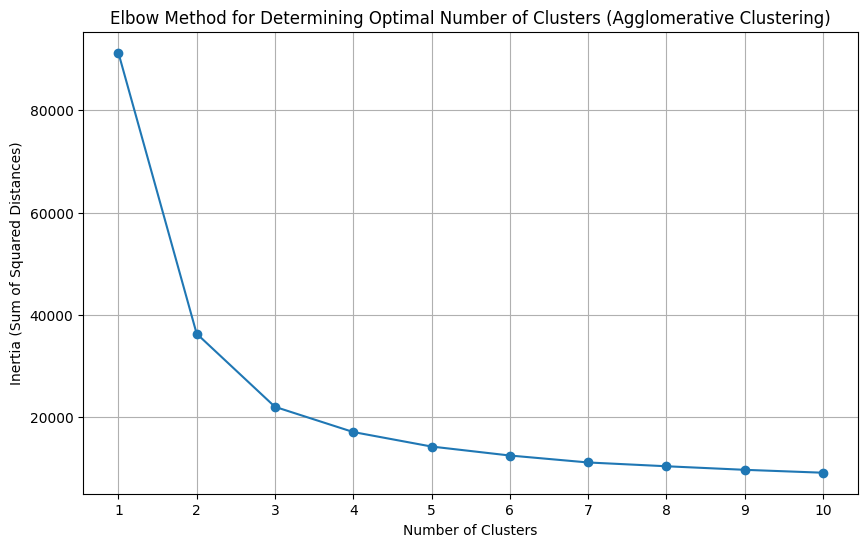


Interpretation of 'elbow point':
This is where the decrease in inertia slows down considerably.
The number of clusters at this elbow point is often considered a suitable value.
The elbow might not always be sharply defined, so this method provides a guideline.


In [24]:
# Use Agglomerative Clustering to find the best features
# Use the elbow method to find a good n_clusters
step = 'Problem1.4model4'
cluster_type = 'Agglomerative'
features = features_all
X =  df_filtered[features]
print(f"{step} Elbow Method: Calculate inertia for different numbers of clusters for {cluster_type} Clustering")

n_cluster_values = range(1, 11)
# Loop through the range of n_clusters values
inertias = []
for n in n_cluster_values:
    # Initialize Agglomerative Clustering model
    agg_clustering = AgglomerativeClustering(n_clusters=n)
    # Fit the model to the data and get cluster labels
    labels = agg_clustering.fit_predict(X)
    # Calculate inertia (Sum of Squared Distances to cluster means)
    inertia_k = 0
    for i in range(n):
        # Get points belonging to the current cluster
        cluster_points = X[labels == i]
        if cluster_points.shape[0] > 0: # Ensure the cluster is not empty
            # Calculate the mean of the cluster and convert to NumPy array before reshaping
            centroid = np.mean(cluster_points, axis=0).values.reshape(1, -1)
            # Calculate squared Euclidean distances from points to the centroid
            # Reshape centroid to a 2D array for euclidean_distances
            distances_sq = euclidean_distances(cluster_points, centroid.reshape(1, -1))**2
            # Sum the squared distances for this cluster
            inertia_k += np.sum(distances_sq)

    # Append the calculated inertia to the list
    inertias.append(inertia_k)
    # print(f"Number of Clusters: {n}, Inertia: {inertia_k:.2f}")

# --- Plotting the Elbow Curve ---
plt.figure(figsize=(10, 6))
plt.plot(n_cluster_values, inertias, marker='o', linestyle='-')
plt.title('Elbow Method for Determining Optimal Number of Clusters (Agglomerative Clustering)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(n_cluster_values) # Show all n_clusters values on x-axis
plt.grid(True)
plt.show()

# --- Interpretation ---
print("\nInterpretation of 'elbow point':")
print("This is where the decrease in inertia slows down considerably.")
print("The number of clusters at this elbow point is often considered a suitable value.")
print("The elbow might not always be sharply defined, so this method provides a guideline.")

In [25]:
df_filtered.describe()

,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,Family Hostory,Melanin,Eosinophils,PNL,Fibrosis,Exocytosis,Acanothosis,Hyperkeratosis,Parakeratosis,Clubbing,Elongation,Thinning,Spongiform,Munro,Focal,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.00000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.081232,1.809524,1.571429,1.355742,0.635854,0.450980,0.170868,0.380952,0.619048,0.526611,0.123249,0.411765,0.142857,0.543417,0.316527,1.372549,1.955182,0.509804,1.288515,0.658263,0.980392,0.641457,0.299720,0.364146,0.40056,0.476190,0.462185,0.952381,0.459384,0.106443,0.117647,1.882353,0.554622,36.397759,2.787115
std,0.663334,0.701218,0.901666,1.136500,0.909780,0.957513,0.577132,0.838321,0.988971,0.910299,0.329185,0.878057,0.416359,0.811741,0.829973,1.111041,0.701689,0.755533,0.922994,1.060406,1.159793,1.041426,0.676512,0.761911,0.85742,0.872565,0.960950,1.129520,0.960836,0.455784,0.494517,0.693183,1.106905,15.224677,1.593368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,3.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,50.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


Problem1.4model4 Agglomerative Clustering Visualization with n_clusters=3


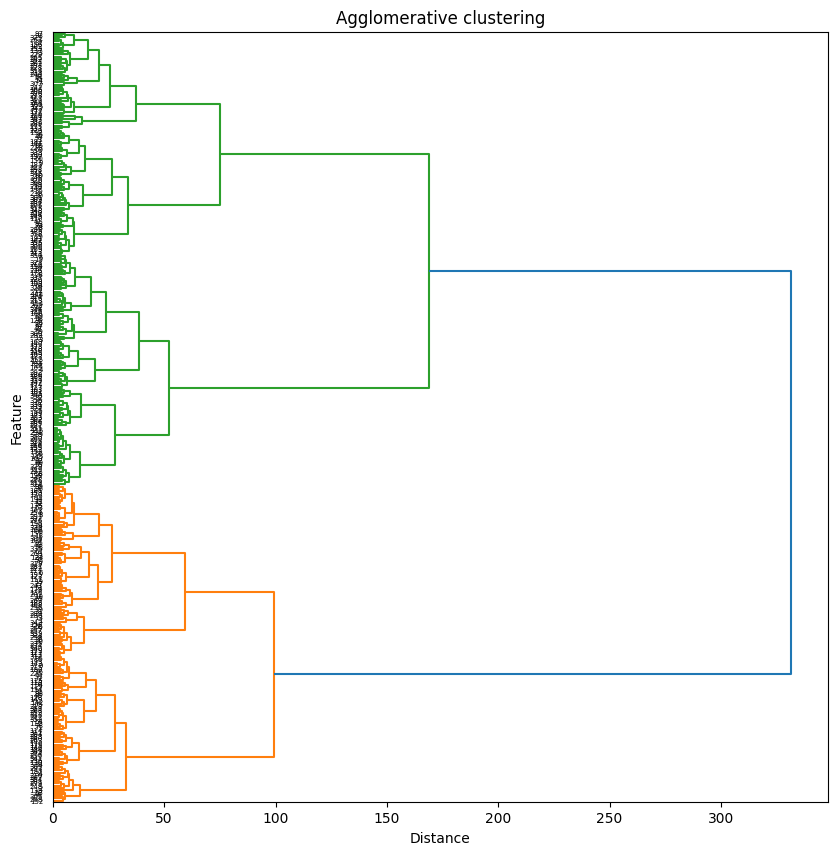

Silhouette Score for Agglomerative Clustering: 0.37528115742675644


In [26]:
step = 'Problem1.4model4'
n_clusters = 3  # From Elbow Method above
cluster_type = 'Agglomerative'
features = features_all
print(f"{step} {cluster_type} Clustering Visualization with {n_clusters=}")

X = df_filtered[features]
# Perform hierarchical clustering
Z = sch.linkage(X, method='ward')

# Perform Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters=n_clusters)
y_ac = ac.fit_predict(X)

# Plot dendrogram
plt.figure(figsize=(10, 10))
plt.title('Agglomerative clustering')
sch.dendrogram(Z, orientation='right')
plt.xlabel('Distance')
plt.ylabel('Feature')
plt.show()

# Calculate silhouette score
a_silhouette = float(silhouette_score(X, y_ac))
print(f"Silhouette Score for Agglomerative Clustering: {a_silhouette}")
results[step] = {'n_clusters': n_clusters, 'cluster_type': cluster_type, 'silhouette_score': a_silhouette, 'features': features}

In [27]:
# Try different linkage methods
step = 'Problem1.4model4-LinkageMethods'
n_clusters = 3  # From Elbow Method above
cluster_type = 'Agglomerative'
features = features_all
print(f"{step} {cluster_type} Clustering Visualization with {n_clusters=}")

X = df_filtered[features]
# Perform hierarchical clustering
for linkage_method in ['ward', 'complete', 'average', 'single']:
    # Perform Agglomerative Clustering
    ac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    y_ac = ac.fit_predict(X)
    # Calculate silhouette score
    a_silhouette = float(silhouette_score(X, y_ac))
    print(f"Silhouette Score for Agglomerative Clustering: {a_silhouette} with {linkage_method=}")
    step_name = f'{step}-link-{linkage_method}'
    results[step_name] = {'n_clusters': n_clusters, 'cluster_type': cluster_type, 'silhouette_score': a_silhouette, 'features': 'all'}

Problem1.4model4-LinkageMethods Agglomerative Clustering Visualization with n_clusters=3
Silhouette Score for Agglomerative Clustering: 0.37528115742675644 with linkage_method='ward'
Silhouette Score for Agglomerative Clustering: 0.40328995475320334 with linkage_method='complete'
Silhouette Score for Agglomerative Clustering: 0.38996899133065455 with linkage_method='average'
Silhouette Score for Agglomerative Clustering: 0.2017957846071795 with linkage_method='single'


We'll use the complete linkage method, but even with that a silhouette_score of .40 is not great, so going back up to the Feature Importances above with the Random Forest classified, let's try with a subset of features:
```
Feature Importances (sorted):
Clubbing            0.074750
Elongation          0.071889
Thinning            0.069287
Fibrosis            0.055052
Age                 0.050124
Vacuolisation       0.043865
Exocytosis          0.040691
Knee                0.038528
Melanin             0.038508```

In [28]:
# Try with a subset of features
step = 'Problem1.4model4-FeatureSubset'
n_clusters = 3  # From Elbow Method above
cluster_type = 'Agglomerative'
features = ['Clubbing', 'Elongation', 'Thinning', 'Fibrosis', 'Vacuolisation', 'Exocytosis', 'Knee', 'Melanin']
linkage_method = 'complete'
print(f"{step} {cluster_type} Clustering Visualization with {n_clusters=} {linkage_method} and subset of features {features}")

X = df_filtered[features]
# Perform hierarchical clustering
ac = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
y_ac = ac.fit_predict(X)
# Calculate silhouette score
a_silhouette = float(silhouette_score(X, y_ac))
print(f"Silhouette Score for Agglomerative Clustering: {a_silhouette} with {linkage_method=}")
results[step] = {'n_clusters': n_clusters, 'cluster_type': cluster_type, 'silhouette_score': a_silhouette, 'features': features, 'linkage_method': linkage_method}

Problem1.4model4-FeatureSubset Agglomerative Clustering Visualization with n_clusters=3 complete and subset of features ['Clubbing', 'Elongation', 'Thinning', 'Fibrosis', 'Vacuolisation', 'Exocytosis', 'Knee', 'Melanin']
Silhouette Score for Agglomerative Clustering: 0.4890731571496051 with linkage_method='complete'


Problem1.4model5 Elbow Method: Calculate inertia for different numbers of clusters for KMeans Clustering


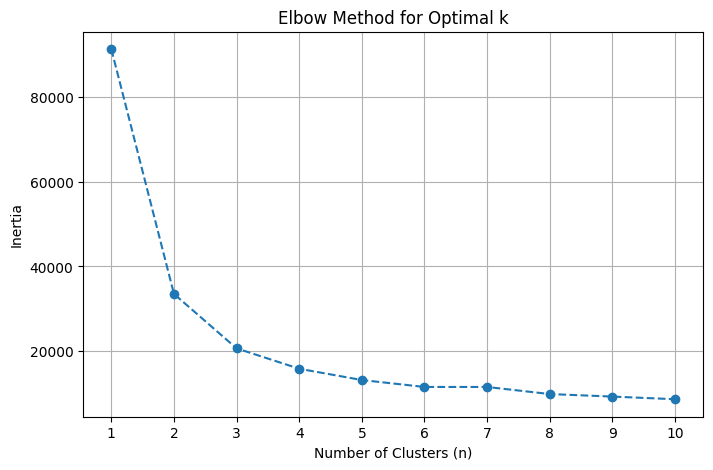

In [29]:
# Use KMeans/Divisive Clustering to find the best features
# Use the elbow method to find a good n_clusters
step = 'Problem1.4model5'
cluster_type = 'KMeans'
features = features_all
X =  df_filtered[features]
print(f"{step} Elbow Method: Calculate inertia for different numbers of clusters for {cluster_type} Clustering")
n_cluster_values = range(1, 11)
inertias = []
for n in n_cluster_values:
    step_name = f'{step}-k{k}'
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertias.append(inertia)
    # results[step_name] = {'step': step, 'model_type': model_type, 'features': 'all', 'predictor': predictor, 'inertia': inertia, 'n_clusters': n}
        
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(n_cluster_values, inertias, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (n)')
plt.ylabel('Inertia')
plt.xticks(n_cluster_values)
plt.grid()
plt.show()

Will use Number of Clusters = 3 as identified above in Elbow method.

Problem1.4model5 KMeans Clustering to predict Disease
Inertia (SSE) for KMeans: 20592.886590383037
Silhouette Score for KMeans: 0.40938494073482984


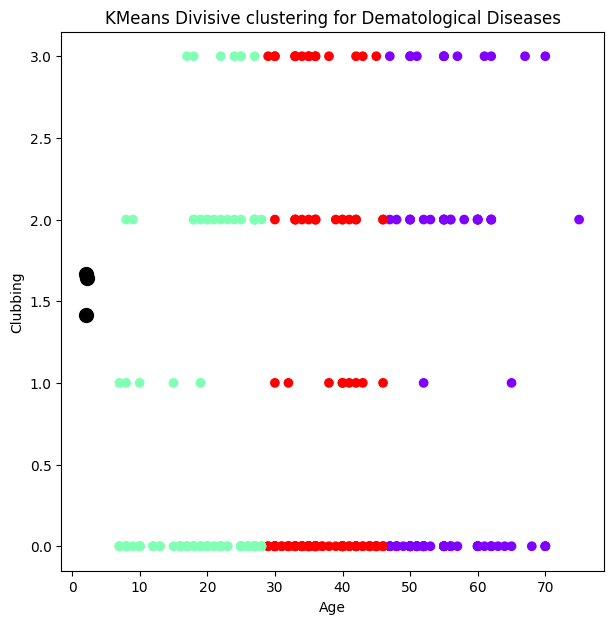

In [30]:
step = 'Problem1.4model5'
cluster_type = 'KMeans'
n_clusters = 3
features = features_all
comparison_features = ['Age', 'Clubbing']  # For Scatter Plot only
X =  df_filtered[features]
print(f"{step} {cluster_type} Clustering to predict Disease")

kmeans = KMeans(n_clusters=n_clusters)
y_means = kmeans.fit_predict(X)
inertia = float(kmeans.inertia_)
print(f"Inertia (SSE) for KMeans: {inertia}")
silhouette_score_value = silhouette_score(X, y_means)
print(f"Silhouette Score for KMeans: {silhouette_score_value}")
centroids = kmeans.cluster_centers_
# Visualize the clusters
plt.figure(figsize=(7,7))
plt.title('KMeans Divisive clustering for Dematological Diseases')
plt.scatter(X[comparison_features[0]], X[comparison_features[1]], c=y_means, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,2], c='black',s=100)
plt.xlabel(comparison_features[0])
plt.ylabel(comparison_features[1])
plt.show()
results[step] = {'n_clusters': n_clusters, 'cluster_type': cluster_type, 'silhouette_score': silhouette_score_value, 'inertia': inertia, 
                 'features': features}

In [31]:
from sklearn.feature_selection import f_classif

X = df_derm[features_all]
y = df_derm['Disease']
f_scores, _ = f_classif(X, y)

# Get top 2 features
top_indices = f_scores.argsort()[-2:][::-1]
top_features = [features_all[i] for i in top_indices]
print("Top 2 features:", top_features)

Top 2 features: ['Band-like', 'Vacuolisation']


## Question 5
Now, compare and contrast the five models you built. Having done both classification and clustering on the same dataset, what can you say about this data and/or the techniques you used? Write your thoughts in 2-3 paragraphs.<p>
### Answer
    Accuracy, F Score, precision<p>
Figure 1 model1 Gradient Descent and Logistic Regression Classifier<p>
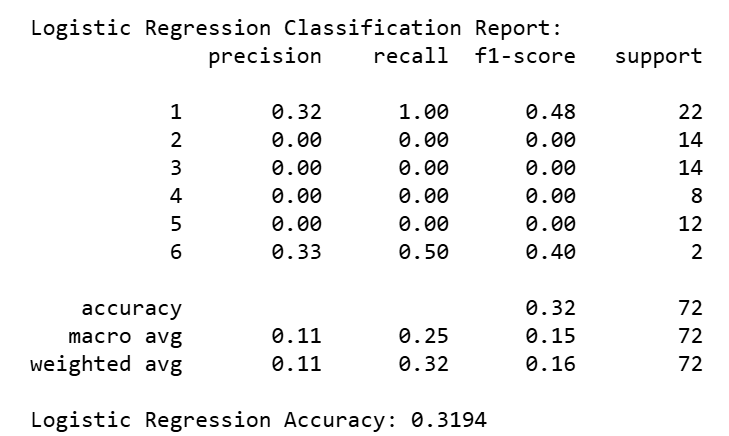<p>
    
Figure 2 model2 Random Forest Classification Report<p>
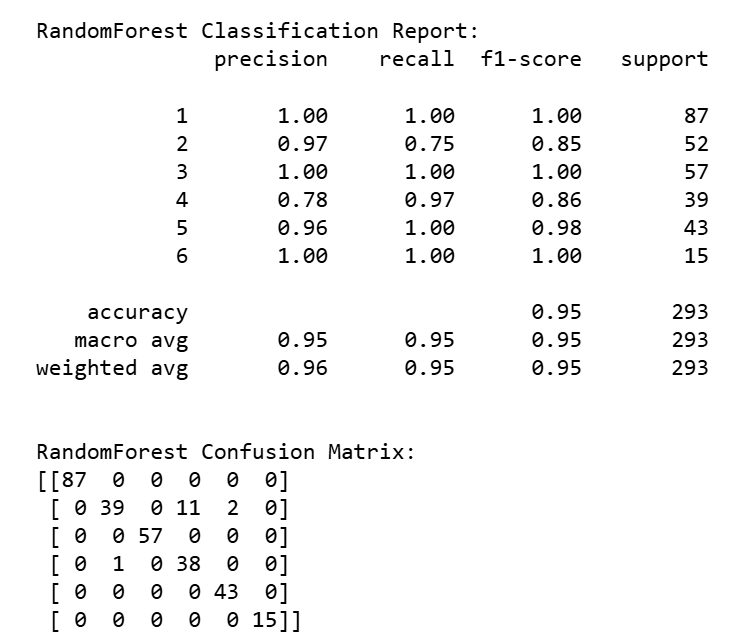<p>
        
Figure 3 model3 KNN Classification Report<p>
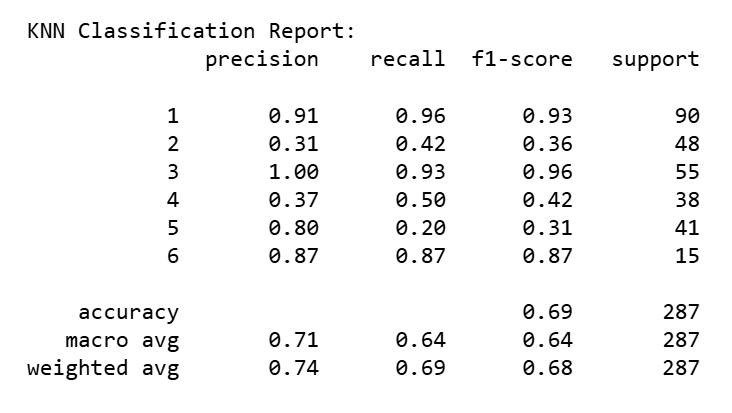<p>

### Question 5 - Answer cont'd
As you can see from Figures 1, 2 and 3 above, The Random Forest model2 has the highest accuracy. model1 uses a Logistic Regression Classifier after Gradient Descent, but Logistic Regression does not work as well on Classification problems, so it makes sense that it would have the lowest accuracy. Also model1 only has one feature Age, so it's prediction power is very limited compared to models 2 and 3 (which have all the features; as per the instructions). The KNN model3 has somewhat good accuracy, 69% but not as good as the Random Forest.<p>
Diseases: psoriasis, seboreic dermatitis, lichen planus, pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.<p>
Inspecting the Confusion Matrix for the Random Forest model2:<p>
 - 87 instances of Actual Class 0 were correctly predicted as psoriasis.
 - 39 instances of Actual Class 1 were correctly predicted as seboreic dermatitis.
 - 57 instances of Actual Class 2 were correctly predicted as lichen planus.
 - 38 instances of Actual Class 3 were correctly predicted as pityriasis rosea.
 - 43 instances of Actual Class 4 were correctly predicted as cronic dermatitis.
 - 15 instances of Actual Class 5 were correctly predicted as pityriasis rubra pilaris.
 - 11 instances of Actual seboreic dermatitis were wrongly predicted as Predicted Class 3.
 - 2 instances of Actual seboreic dermatitis were wrongly predicted as Predicted Class 4.
 - 1 instance of Actual pityriasis rosea was wrongly predicted as Predicted Class 1.
The Random Forest model seems to perform very well in identifying classes 0, 2, 4, and 5. For these classes, it made very few or no misclassifications from their actual class into other classes. The model has some difficulty distinguishing between Class 1 and Class 3.<p>
    
The Clustering Methods used were: Agglomerative (model4) and Divisive K-Means (model5). The Elbow method was used to pick optimal n_clusters = 3 for both models.<p>
   
The Silhouette Score for Agglomerative Clustering (ward linkage) was 0.40. Since this was fairly low (ie below .5) I decided to try different linkage methods:<p>
 - Silhouette Score for Agglomerative Clustering: 0.4048196500727039 with linkage_method='complete'
 - Silhouette Score for Agglomerative Clustering: 0.389038200288299 with linkage_method='average'
 - Silhouette Score for Agglomerative Clustering: 0.19507629258757792 with linkage_method='single'
    
Which did yeild one higher, 'complete', but still not above .5. <p>
For the K-Means model5, the Inertia (SSE) was 21,016 and the Silhouette Score was 0.41<p>

Based on the results of the five models, I would use the Random Forest model to predict diseases on this dataset.

In [32]:
if False:
    for o in results.items():
        print(o)

## Problem 2: Hate Crimes
Use this data to answer the following questions. Use appropriate machine learning techniques/algorithms.
1. How does income inequality relate to the number of hate crimes and hate incidents? [5 points]
2. How can we predict the number of hate crimes and hate incidents from race/nature of the population? [5 points]
3. How does the number of hate crimes vary across states? Is there any similarity in number of hate incidents (per 100,000 people) between some states than in others — both according to the SPLC after the election and the FBI before it? [10 points]
Note: For the first two questions:
Choose the variables which you think are related to the predictors (income inequality, race and nature of the population) to build your model. Justify your selection.
Refine your model iteratively.
[Hint: You can use gradient descent, or/and add/remove variables in an incremental fashion].
For each of the decisions made about what techniques/algorithms to use, make sure to provide your justification or thoughts.
4. Overall presentation (lack of spelling and other errors, consistent formatting, clear results). [5 points]

In [33]:
df_crime = pd.read_csv('hatecrime.csv')
print(df_crime.columns)
display(df_crime.head(3))

Index(['state', 'median_household_income', 'share_unemployed_seasonal',
       'share_population_in_metro_areas',
       'share_population_with_high_school_degree', 'share_non_citizen',
       'share_white_poverty', 'gini_index', 'share_non_white',
       'share_voters_voted_trump', 'hate_crimes_per_100k_splc',
       'avg_hatecrimes_per_100k_fbi'],
      dtype='object')


,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928


In [34]:
features_all = ['median_household_income', 'share_unemployed_seasonal', 'share_population_in_metro_areas',
                'share_population_with_high_school_degree', 'share_non_citizen', 'share_white_poverty', 
                'gini_index', 'share_non_white', 'share_voters_voted_trump']

## Question 1
How does income inequality relate to the number of hate crimes and hate incidents?<p>

In [35]:
# Correlation between income inequality and hate crimes
cor_gini_splc = df_crime['gini_index'].corr(df_crime['hate_crimes_per_100k_splc'])
cor_gini_fbi = df_crime['gini_index'].corr(df_crime['avg_hatecrimes_per_100k_fbi'])

print(f"Gini vs SPLC: {cor_gini_splc:.3f}")
print(f"Gini vs FBI: {cor_gini_fbi:.3f}")

Gini vs SPLC: 0.329
Gini vs FBI: 0.421


"Gini" refers to a the statistician Corrado Gini. In 1912 Gini came up with a number that represents how much inequality of income distribution exists in a given area.<p>
Gini vs SPLC: 0.329 → Income inequality is moderately associated with reported hate crimes (SPLC data).<p>
Gini vs FBI: 0.421 → The association is even stronger with official FBI reports.<p>

There is a moderate positive correlation between income inequality and hate crime rates. The Gini index correlates with SPLC-reported hate crimes at 0.329 and with FBI-reported rates at 0.421, suggesting that states with greater income inequality tend to report more hate crimes per 100,000 people.

## Question 2
How can we predict the number of hate crimes and hate incidents from race/nature of the population?<p>

In [36]:
df_crime.isnull().sum()[df_crime.isnull().sum()>0]

share_non_citizen              3
hate_crimes_per_100k_splc      4
avg_hatecrimes_per_100k_fbi    1
dtype: int64

In [37]:
df_crime_filtered = df_crime.dropna()

In [38]:
step = 'Problem2.2'
X = df_crime_filtered[['share_non_citizen', 'share_non_white']]
for predictor in ['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']:
    y = df_crime_filtered[predictor]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     hate_crimes_per_100k_splc   R-squared:                       0.071
Model:                                   OLS   Adj. R-squared:                  0.027
Method:                        Least Squares   F-statistic:                     1.612
Date:                       Wed, 07 May 2025   Prob (F-statistic):              0.212
Time:                               17:08:23   Log-Likelihood:                0.42017
No. Observations:                         45   AIC:                             5.160
Df Residuals:                             42   BIC:                             10.58
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------

The second OLS regression predicting hate_crimes_per_100k_splc has a low R-squared and some non-significant coefficients, which might suggest the model is not a strong fit for the data. The R-squared value of 0.121 means that the model only explains 12.1% of the variance in the dependent variable (hate_crimes_per_100k_splc). The P-value for share_non_citizen is 0.110, which is above the typical threshold of 0.05, meaning it is not statistically significant in predicting the outcome. The P-value for share_non_white is 0.466, also far above 0.05, indicating it's also not significant.<p>
    <b>Overall this first model is not good at all.</b><p>
        
The first OLS regression predicting avg_hatecrimes_per_100k_fbi has a low R-squared and some non-significant coefficients, which might suggest the model is not a strong fit for the data. The R-squared value of 0.071 means that the model only explains 7.1% of the variance in the dependent variable (hate_crimes_per_100k_splc). TThe p-value for share_non_citizen is significant (below 0.05), indicating that it is statistically significant in predicting the number of hate crimes per 100k people. This suggests that the proportion of non-citizens is a relevant predictor. The p-value for share_non_white is not significant (greater than 0.05). This suggests that share_non_white is not a statistically significant predictor of the number of hate crimes in this model. The F-statistic (2.893) has a p-value of 0.0665, which is close to the 0.05 threshold. This means the model is marginally significant overall, but it's not a strong predictor.<p>
    
<b>I will use the second model predicting the FBI data and remove the `share_non_white` feature.

The first OLS regression predicting avg_hatecrimes_per_100k_fbi has a low R-squared and some non-significant coefficients, which might suggest the model is not a strong fit for the data. The R-squared value of 0.071 means that the model only explains 7.1% of the variance in the dependent variable (hate_crimes_per_100k_splc). TThe p-value for share_non_citizen is significant (below 0.05), indicating that it is statistically significant in predicting the number of hate crimes per 100k people. This suggests that the proportion of non-citizens is a relevant predictor. The p-value for share_non_white is not significant (greater than 0.05). This suggests that share_non_white is not a statistically significant predictor of the number of hate crimes in this model. The F-statistic (2.893) has a p-value of 0.0665, which is close to the 0.05 threshold. This means the model is marginally significant overall, but it's not a strong predictor.<p>
<b>Overall this first model is not good at all.</b><p>
    
The second OLS regression predicting hate_crimes_per_100k_splc has a low R-squared and some non-significant coefficients, which might suggest the model is not a strong fit for the data. The R-squared value of 0.121 means that the model only explains 12.1% of the variance in the dependent variable (hate_crimes_per_100k_splc). However, it is better than the first model. The P-value for share_non_citizen is 0.110, which is above the typical threshold of 0.05, meaning it is not statistically significant in predicting the outcome. The P-value for share_non_white is 0.466, also far above 0.05, indicating it's also not significant.<p>
   
<b>I will use the second model predicting the FBI data and remove the `share_non_white` feature.

In [39]:
<b>Question:</b> How can we predict the number of hate crimes and hate incidents from race/nature of the population?<p>
<b>Answer:</b> Since the goal is to predict a continous value, ie hate crimes per capita, I tried several different Regression models with varying results. KNN Regressor had a weak positive fit (R² of ~.09) and was better than Logistic Regression with an accuracy of 44% so these models were rejected.<p>
Next I tried a Random Forest Classifier predicting the FBI hate crimes which had a negative R² of ~-.10 indicating this model is worse than the mean. Repeated Random Forest Classifier predicting the SPLA data resulted in a much better R² of ~.12 but still not that good.<p>
Then I tried the models above by varrying the value to predict and the features with Ordinary Least Squares. When predicting `avg_hatecrimes_per_100k_fbi` I got a R² of ~.52 suggesting a good fit, but when predicting `hate_crimes_per_100k_splc` the model performed even better with a R² of ~.60<p>
Using the P values, I removed all features that were not statistically significant, (keeping only `gini_index` `share_voters_voted_trump`) but that model, with R² of ~.44 didn't perform as well as the OLS model with all the features.<p>
So out of the model attempted, the best model is OLS with all the features, predicting hate_crimes_per_100k_splc.
    
<b>Question:</b> How can we predict the number of hate crimes and hate incidents from race/nature of the population?<p>
<b>Answer:</b> To predict the continuous value of hate crimes per capita, several regression models were tested and evaluated using the R-squared metric.<p>

Initial attempts with a K-Nearest Neighbors (KNN) Regressor and a Random Forest Regressor yielded low R-squared values (approximately 0.09 and 0.12, respectively, for the better-performing SPLC data), indicating poor predictive power. A Random Forest model predicting the FBI data even resulted in a negative R-squared (~-0.10), performing worse than simply predicting the mean.<p>

Ordinary Least Squares (OLS) regression showed significantly better results. Predicting avg_hatecrimes_per_100k_fbi with OLS gave an R-squared of approximately 0.56. The performance improved when predicting hate_crimes_per_100k_splc with OLS, achieving an R-squared of approximately 0.60.<p>

An attempt to simplify the OLS model by removing non-statistically significant features (based on P-values) resulted in a reduced R-squared of approximately 0.44, demonstrating that including all features provided a better fit in this case.<p>

Therefore, the Ordinary Least Squares (OLS) model, utilizing all features to predict hate_crimes_per_100k_splc, was identified as the best-performing model among those evaluated, with an R-squared of approximately 0.60.<p>

SyntaxError: invalid syntax (4036432361.py, line 1)

### SPLC vs FBI Data
There are two indicators of hate crimes, one from the Southern Poverty Law Center (SPLC) and one from the Federal Beureau of Investigation (FBI). Both of these sources are reliable and rigerous and can generally be relied on. However, the SPLC data is from less than 10 days of data in 2016.

In [ ]:
# Will try a new simple model based on results from above
X = df_crime_filtered[['share_non_citizen']]  # Dropping share_non_white
y = df_crime_filtered['avg_hatecrimes_per_100k_fbi']

X = sm.add_constant(X)
model_new = sm.OLS(y, X).fit()
print(model_new.summary())

In [ ]:
features = ['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']
X = df_crime[features].dropna()  # ensure no NaNs

# Optional: Store state names to use as labels
state_labels = df_crime.loc[X.index, 'state']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Agglomerative clustering using Ward's method
linked = sch.linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(linked, labels=state_labels.values, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of States by Hate Crimes (SPLC vs FBI)')
plt.xlabel('State')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()

It was surprising to see Connecticut and Kentucky in the same node, so will investigate.

In [ ]:
df_crime[df_crime['state'].isin(['Connecticut', 'Kentucky'])].T

Although the two states differ in some very significant ways: Median Household Income and % who live in a Metro area, their `hate_crimes_per_100k_splc` from after the election are very similar. However, the data from before the election shows a 20% difference.

In [ ]:
df_crime['splc_scaled_to_annual'] = df_crime['hate_crimes_per_100k_splc'] * (365 / 9)
df_crime['diff_splc_fbi'] = df_crime['splc_scaled_to_annual'] - df_crime['avg_hatecrimes_per_100k_fbi']
df_increase = df_crime.sort_values(by='diff_splc_fbi', ascending=False)[['state', 'diff_splc_fbi', 'splc_scaled_to_annual','avg_hatecrimes_per_100k_fbi', 'hate_crimes_per_100k_splc']]
display(df_increase.head(10))

Note: Choose the variables which you think are related to the predictors (income inequality, race and nature of the population) to build your model. Justify your selection.<p>
Although questions 1 and 2 implied limiting the features, I will now look at all the features to see if others are more predictive.

In [ ]:
# Will try a new simple model based on results from above
features = ['median_household_income', 'share_unemployed_seasonal', 'share_population_in_metro_areas', 'share_population_with_high_school_degree', 'share_non_citizen',
            'share_white_poverty', 'gini_index', 'share_non_white', 'share_voters_voted_trump']
X = df_crime_filtered[features]  # Dropping share_non_white
for predictor in ['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']:
    y = df_crime_filtered[predictor]
    X = sm.add_constant(X)
    model_new = sm.OLS(y, X).fit()
    print(model_new.summary())

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

X = df_crime_filtered[features_all]
for predictor in ['avg_hatecrimes_per_100k_fbi', 'hate_crimes_per_100k_splc']:
    print('-'*120)
    print(f"Random Forest Classifier Using Predictor {predictor}")
    y = df_crime_filtered[predictor]

    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))

    # Optional: Feature importance
    importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    print("Feature importances:\n", importances)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

X = df_crime_filtered[features_all]
for predictor in ['avg_hatecrimes_per_100k_fbi', 'hate_crimes_per_100k_splc']:
    print(f"Predictor {predictor}")
    y = df_crime_filtered[predictor]
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Scale features for KNN
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    ### KNN Regression
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train_scaled, y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    print("KNN Regression")
    print(f"MSE: {mean_squared_error(y_test, y_pred_knn)}")
    print(f"R² Score: {r2_score(y_test, y_pred_knn)}\n")
    ### Logistic Regression
    y_class = (y > y.median()).astype(int)  # Binary classification: high vs low crime
    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)
    X_train_c_scaled = scaler.fit_transform(X_train_c)
    X_test_c_scaled = scaler.transform(X_test_c)
    logreg = LogisticRegression()
    logreg.fit(X_train_c_scaled, y_train_c)
    score = logreg.score(X_test_c_scaled, y_test_c)
    print("Logistic Regression")
    print(f"Accuracy: {score}")
    print(' ')

In [ ]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

X_cluster = df_crime_filtered[features_all]
state_labels = df_crime_filtered['state']

# Standardize the features used for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# --- Plot the Dendrogram and Capture Color Information ---
# Generate the linkage matrix
linked = sch.linkage(X_scaled, method='ward')

# Plot the dendrogram and get the return dictionary
# Using a color_threshold here can help define 'clusters' in the dendrogram colors
# Let's use a threshold that visually separates the main groups (e.g., 6 in the example image provided by the user)
# You might need to adjust the color_threshold based on your dendrogram's structure
color_threshold = 6 # Example threshold, adjust based on your dendrogram plot

plt.figure(figsize=(12, 6))
dendro_info = sch.dendrogram(linked,
                             labels=state_labels.values,
                             leaf_rotation=90,
                             leaf_font_size=10,
                             color_threshold=color_threshold, # Color branches below this height
                             above_threshold_color='k' # Color branches above threshold black
                            )
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('State')
plt.ylabel('Euclidean Distance')
plt.grid(False)
plt.tight_layout()
plt.show()

# --- Extract Colors Assigned by Dendrogram and Map to Original Data Order ---
# dendro_info['leaves'] gives the original indices in the order they appear in the dendrogram
# dendro_info['leaves_color_list'] gives the color string for each leaf label in that order

# Create an array to store the color for each original data point
# Initialize with a default color (e.g., 'gray')
scatter_colors = np.full(len(df_crime_filtered), 'gray', dtype=object)

# Map the colors from the dendrogram leaves back to the original data indices
leaf_order = dendro_info['leaves'] # Original indices in dendrogram order
leaf_colors = dendro_info['leaves_color_list'] # Colors in dendrogram order

# Iterate through the leaf order and assign the corresponding color to the original index
for i in range(len(leaf_order)):
    original_index = leaf_order[i]
    color_for_leaf = leaf_colors[i]
    scatter_colors[original_index] = color_for_leaf

# --- Plot the Scatter Plot using Dendrogram Colors ---
X_scatter = df_crime_filtered['hate_crimes_per_100k_splc']
y_scatter = df_crime_filtered['avg_hatecrimes_per_100k_fbi']

plt.figure(figsize=(12, 8))

# Use the scatter_colors array for coloring
scatter = plt.scatter(X_scatter, y_scatter, c=scatter_colors, s=100, alpha=0.7) # No cmap needed, colors are strings

# Add state labels to each point
df_states_aligned = df_crime_filtered['state']
for i, state in enumerate(df_states_aligned):
    plt.text(X_scatter.iloc[i], y_scatter.iloc[i], state, fontsize=8, ha='right', va='bottom')

plt.xlabel('Hate Crimes per 100K Nov 2016 SPLC')
plt.ylabel('Hate Crimes per 100K pre-2016 FBI')
plt.title('Scatter Plot of Hate Crimes Colored by Dendrogram Leaf Colors')

# Creating a legend for the colors based on the dendrogram's color assignment
# This part is a bit manual as dendrogram doesn't provide a simple color-to-group mapping
# We can collect the unique colors used and try to associate them with groups of states
unique_colors = np.unique(scatter_colors)
print("\nUnique colors used in scatter plot (from dendrogram):", unique_colors)

# Optional: Print which states got which color to help interpret the scatter plot colors
color_state_map = {}
for color in unique_colors:
    states_with_this_color = df_crime_filtered[scatter_colors == color]['state'].tolist()
    color_state_map[color] = states_with_this_color
    print(f"Color {color}: {states_with_this_color}")

# Adding a legend automatically from scatter points can be tricky with string colors.
# Manual legend creation might be needed if you want labels for each color group.
# For simplicity, we'll rely on the printout above to see which states have which color.
# If you need a legend, you'd typically create proxy artists.

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [45]:
print("States and Sorted hate_crimes_per_100k_splc:")
# Sort the DataFrame by 'hate_crimes_per_100k_splc' and display 'state' and that column
sorted_splc = df_crime_filtered.sort_values(by='hate_crimes_per_100k_splc', ascending=False)
display(sorted_splc[['state', 'hate_crimes_per_100k_splc']])

print("\nStates and Sorted avg_hatecrimes_per_100k_fbi:")
# Sort the DataFrame by 'avg_hatecrimes_per_100k_fbi' and display 'state' and that column
sorted_fbi = df_crime_filtered.sort_values(by='avg_hatecrimes_per_100k_fbi', ascending=False)
display(sorted_fbi[['state', 'avg_hatecrimes_per_100k_fbi']])

States and Sorted hate_crimes_per_100k_splc:


,state,hate_crimes_per_100k_splc
8,District of Columbia,1.522302
37,Oregon,0.832850
47,Washington,0.677488
21,Massachusetts,0.630811
23,Minnesota,0.627480
26,Montana,0.495491
15,Iowa,0.454427
22,Michigan,0.403779
5,Colorado,0.390523
20,Maryland,0.370439



States and Sorted avg_hatecrimes_per_100k_fbi:


,state,avg_hatecrimes_per_100k_fbi
8,District of Columbia,10.953480
21,Massachusetts,4.801899
30,New Jersey,4.413203
17,Kentucky,4.207890
47,Washington,3.817740
6,Connecticut,3.772701
23,Minnesota,3.612412
2,Arizona,3.413928
37,Oregon,3.394886
35,Ohio,3.240420


The Gini Index, which is a measurement of income inequality, seems to be the only statistically significant predictor of either hate crime statistic with a P-value of .5 or less.